In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing

## Loading the Dataset
 The dataset is loaded and unnecessary columns, such as `id`, are removed and `age` is converted into yeears.

In [2]:
df = pd.read_csv("cardio_train_data/cardio_train.csv",sep=";")
df.drop(["id"],axis=1,inplace=True)     #dropping the "id" column
df["age"] = df["age"]/365   #converting age into years
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
5,60.038356,1,151,67.0,120,80,2,2,0,0,0,0
6,60.583562,1,157,93.0,130,80,3,1,0,0,1,0
7,61.873973,2,178,95.0,130,90,3,3,0,0,1,1
8,48.405479,1,158,71.0,110,70,1,1,0,0,1,0
9,54.339726,1,164,68.0,110,60,1,1,0,0,0,0


### Checking the dataset for null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [4]:
#checking for null values
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Splitting the features into numerical and categorical features

In [5]:
#number of unique values each feature has
df.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [6]:
categorical_columns = ["gender","cholesterol","gluc","smoke","alco","active"]
numerical_columns = ["age","height","weight","ap_hi","ap_lo"]

## Feature Selection
### Pre-processing numerical features

In [7]:
df[numerical_columns].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,164.359229,74.205690,128.817286,96.630414
std,6.759594,8.210126,14.395757,154.011419,188.472530
min,29.583562,55.000000,10.000000,-150.000000,-70.000000
25%,48.394521,159.000000,65.000000,120.000000,80.000000
50%,53.980822,165.000000,72.000000,120.000000,80.000000
75%,58.430137,170.000000,82.000000,140.000000,90.000000
max,64.967123,250.000000,200.000000,16020.000000,11000.000000


#### Creating boxplot for `ap_lo` and `ap_hi` and filtering unrealistic values

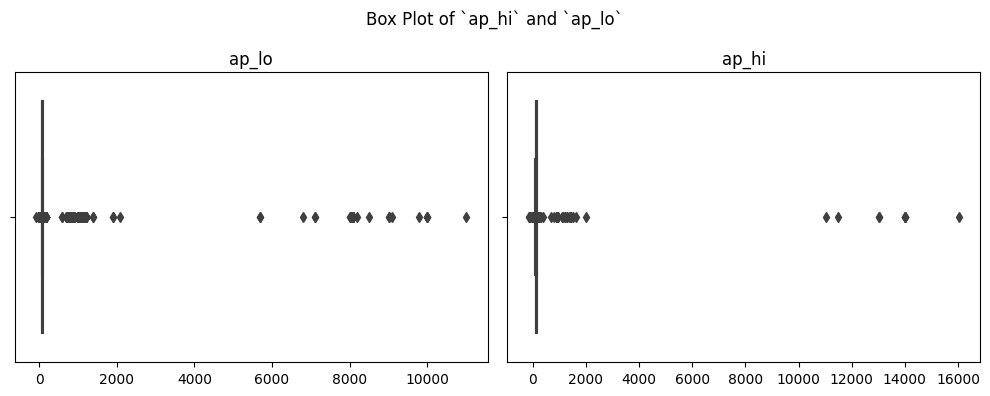

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.boxplot(df, x= "ap_lo", ax = ax[0])
sns.boxplot(df, x= "ap_hi", ax = ax[1])
ax[0].set_title("ap_lo")
ax[0].set_xlabel(None)
ax[1].set_title("ap_hi")
ax[1].set_xlabel(None)
fig.suptitle("Box Plot of `ap_hi` and `ap_lo`")
plt.tight_layout()

**Observation**: The blood pressure values should fall within a physiologically realistic range. Values outside this range will be filtered. We choose the thershold of 370/360 mm Hg as given [here](<https://pubmed.ncbi.nlm.nih.gov/7741618/#:~:text=The%20highest%20pressure%20recorded%20in,005).&text=BP%20was%20recorded%20in%2010,maximal%20lifting%20with%20slow%20exhalation.>).

In [9]:
#filetering unrealistic blood pressure values
df = df[(df["ap_hi"] <= 370) & (df["ap_hi"] >= 0)]
df = df[(df["ap_lo"] <= 360) & (df["ap_lo"] >= 0)].reset_index(drop=True) 

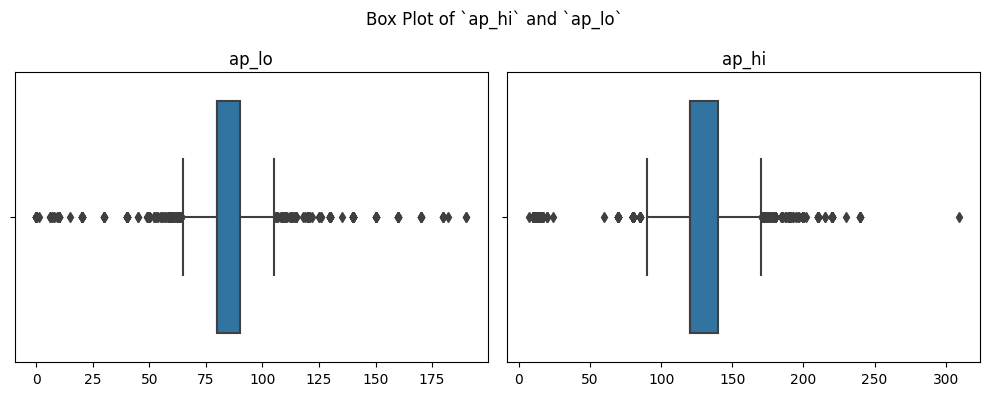

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

sns.boxplot(df, x= "ap_lo", ax = ax[0])
sns.boxplot(df, x= "ap_hi", ax = ax[1])
ax[0].set_title("ap_lo")
ax[0].set_xlabel(None)
ax[1].set_title("ap_hi")
ax[1].set_xlabel(None)
fig.suptitle("Box Plot of `ap_hi` and `ap_lo`")
plt.tight_layout()

#### Creating histogram plot with `cardio` as hue

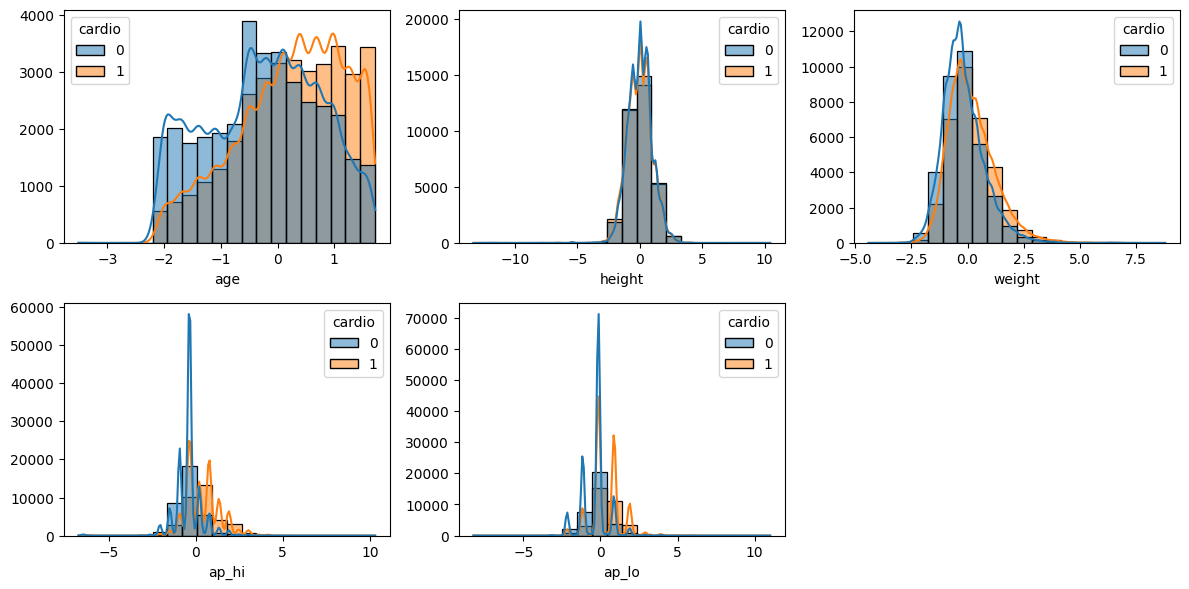

In [41]:
fig, ax = plt.subplots(nrows= int(np.ceil(len(numerical_columns)/3)), ncols=3, figsize = (12,6))
for k,col in enumerate(numerical_columns):
    r = int(k//3)
    c = int(k%3)
    sns.histplot(data = df, x = col, bins= 20, hue = "cardio", ax=ax[r,c],kde= True)
    ax[r,c].set_ylabel(None)
k += 1
r = int(k//3)
c = int(k%3)
fig.delaxes(ax=ax[r,c])
plt.tight_layout()

#### Creating boxplot with `cardio` as hue

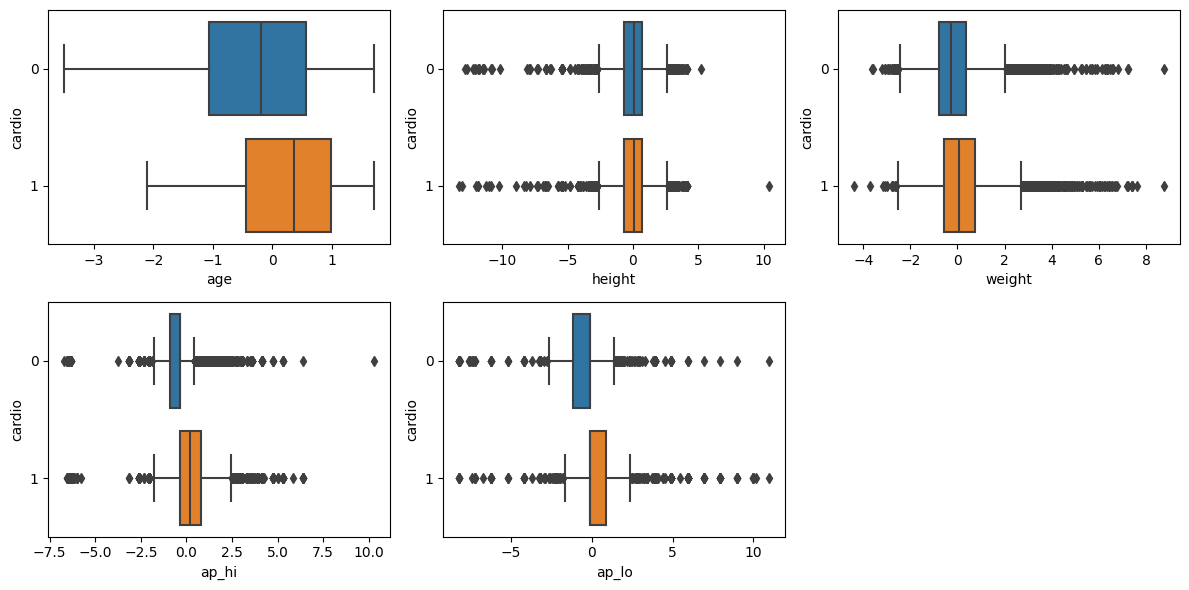

In [40]:
df["cardio"] = df["cardio"].astype(str)
fig, ax = plt.subplots(nrows= int(np.ceil(len(numerical_columns)/3)), ncols=3, figsize = (12,6))
for k,col in enumerate(numerical_columns):
    r = int(k//3)
    c = int(k%3)
    sns.boxplot(data = df, x = col, y = "cardio", ax=ax[r,c])
k += 1
r = int(k//3)
c = int(k%3)
fig.delaxes(ax=ax[r,c])
plt.tight_layout()

#### Scaling numerical features

The numerical features is scaled using standard scaler as the data is normally distributed which is evident from the histogram plot.

In [14]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_data = scaler.fit(df[numerical_columns])
scaled_numerical_data = scaler.transform(df[numerical_columns])
df[numerical_columns] = scaled_numerical_data
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.433834,2,0.443711,-0.845741,-0.921194,-0.134931,1,1,0,0,1,0
1,0.309613,1,-1.018961,0.759448,0.771644,0.877460,3,1,0,0,1,1
2,-0.245845,1,0.078043,-0.706160,0.207365,-1.147322,3,1,0,0,0,1
3,-0.745799,2,0.565600,0.550076,1.335923,1.889851,1,1,0,0,1,1
4,-0.806166,1,-1.018961,-1.264486,-1.485474,-2.159713,1,1,0,0,0,0
5,0.992694,1,-1.628408,-0.496787,-0.356915,-0.134931,2,2,0,0,0,0
6,1.073318,1,-0.897072,1.317775,0.207365,-0.134931,3,1,0,0,1,0
7,1.264143,2,1.662604,1.457357,0.207365,0.877460,3,3,0,0,1,1
8,-0.727567,1,-0.775183,-0.217624,-0.921194,-1.147322,1,1,0,0,1,0
9,0.149985,1,-0.043847,-0.426996,-0.921194,-2.159713,1,1,0,0,0,0


#### Checking correlation between numerical features using correlation matrix

In [15]:
corr_matrix = df[numerical_columns].corr()
corr_matrix

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.080724,0.055154,0.197734,0.150938
height,-0.080724,1.000000,0.291529,0.017576,0.035898
weight,0.055154,0.291529,1.000000,0.254697,0.245399
ap_hi,0.197734,0.017576,0.254697,1.000000,0.644223
ap_lo,0.150938,0.035898,0.245399,0.644223,1.000000


Thus, no two numerical features are related.

### Pre-processing categorical features ###

In [18]:
#Looking at Categorical Features
df[categorical_columns].head(10)

,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
4,1,1,1,0,0,0
5,1,2,2,0,0,0
6,1,3,1,0,0,1
7,2,3,3,0,0,1
8,1,1,1,0,0,1
9,1,1,1,0,0,0


#### Creating countplot with `cardio` as hue

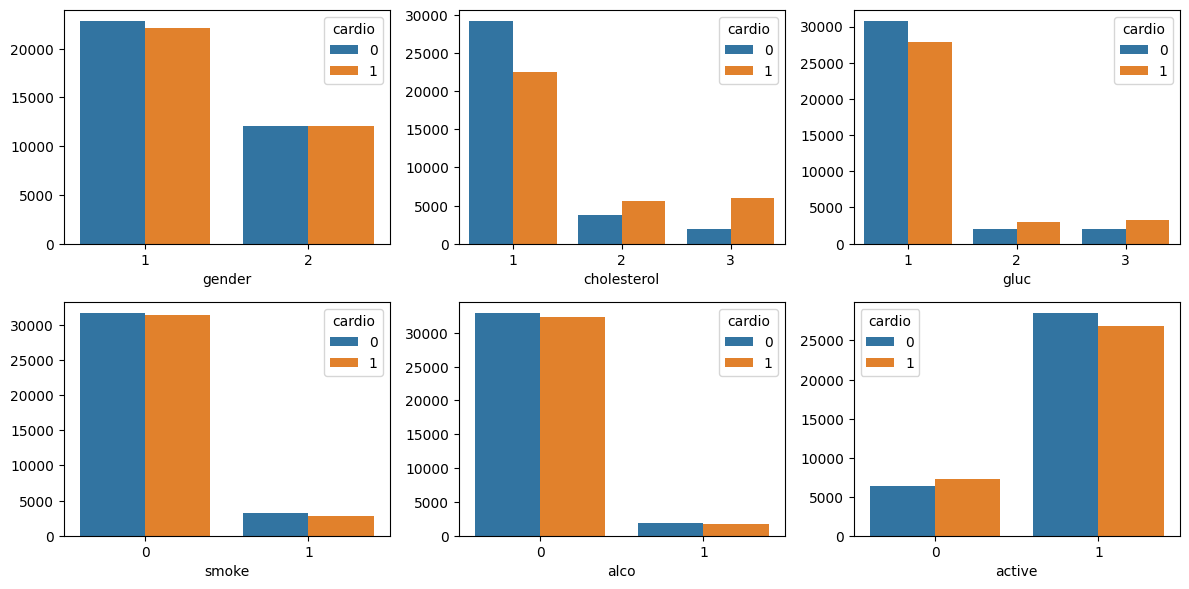

In [39]:
df["cardio"] = df["cardio"].astype(str)
fig, ax = plt.subplots(nrows= int(np.ceil(len(numerical_columns)/3)), ncols=3, figsize = (12,6))
for k,col in enumerate(categorical_columns):
    r = int(k//3)
    c = int(k%3)
    sns.countplot(data = df, x = col, hue = "cardio", ax=ax[r,c])
    ax[r,c].set_ylabel(None)
plt.tight_layout()

In [ ]:
for col in categorical_columns:
    sns.countplot(data=df,x= col)
    plt.show()

In [ ]:
alco_cardio_contingency_table = pd.crosstab(df["alco"],df["cardio"],margins=True)
alco_cardio_contingency_table

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(alco_cardio_contingency_table)
chi2

In [ ]:
cholesterol_cardio_contingency_table = pd.crosstab(df["cholesterol"],df["cardio"],margins=True)
cholesterol_cardio_contingency_table

In [ ]:
chi2, p, dof, expected = chi2_contingency(cholesterol_cardio_contingency_table)
chi2

In [ ]:
sns.histplot(df, x="age", hue="cholesterol", bins=15, kde=True)